## Decision Tree Classification models to predict employee turnover

Neste exemplo iremos utilizar arvores de decisão para prever saída de funcionários: 

Variáveis Target:
* Active - the employee is still in their role
* Non-active - the employee has resigned

### Instalando o anaconda 3

* curl -O https://repo.anaconda.com/archive/Anaconda3-2019.03-Linux-x86_64.sh
* bash Anaconda3-2019.03-Linux-x86_64.sh

In [2]:
# Bibliotecas para preparação dos dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

# Importando classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Importando bibliotecas e validação
# conda install -c conda-forge pydotplus
from sklearn.tree import export_graphviz
import pydotplus as pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# Funções de suporte
from support_functions import calculate_accuracy, plot_confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Carregando csv em um array do numpy
data = np.genfromtxt("emp_turnover.csv", delimiter=',', skip_header=1,
                     dtype={'names': ('Tenure', 'Age', 'Category', 'Gender', 'Department', 'Dept_Ratio', 'Amount', 'Class'),
                            'formats': ('i4', 'i4', 'i4', 'i4', 'i4', 'f8', 'f8', 'U10')})

In [6]:
# Estrutura e primeira linha dos dados
print (data.shape)
data[:5]

(1056,)


array([(1958, 32, 0, 0, 13, 0.006, 39.3733, 'Non-active'),
       (3894, 61, 1, 1, 28, 0.046, 23.0003, 'Non-active'),
       (1672, 22, 2, 0, 17, 0.03 , 21.3228, 'Non-active'),
       (1116, 30, 2, 1, 27, 0.012, 21.3228, 'Non-active'),
       (1795, 24, 2, 0, 21, 0.014, 28.339 , 'Non-active')],
      dtype=[('Tenure', '<i4'), ('Age', '<i4'), ('Category', '<i4'), ('Gender', '<i4'), ('Department', '<i4'), ('Dept_Ratio', '<f8'), ('Amount', '<f8'), ('Class', '<U10')])

In [4]:
# Carregando em um dataframe do pandas 
df = pd.read_csv('emp_turnover.csv')
# Formato tabed
df.head(16)

,Tenure,Age,Category,Gender,Department,Dept_Ratio,Amount,Class
0,1958,32,0,0,13,0.006,39.3733,Non-active
1,3894,61,1,1,28,0.046,23.0003,Non-active
2,1672,22,2,0,17,0.030,21.3228,Non-active
3,1116,30,2,1,27,0.012,21.3228,Non-active
4,1795,24,2,0,21,0.014,28.3390,Non-active
5,5824,68,0,1,24,0.011,42.5983,Non-active
6,6439,53,0,0,11,0.096,22.5303,Active
7,1914,24,2,1,37,0.099,21.3228,Non-active
8,1784,24,2,1,37,0.099,21.3228,Non-active
9,1455,53,2,1,29,0.195,20.1415,Non-active


In [7]:
# Selecionando a % dos dados de treino
fraction_training = 0.70

# Quebrando os dados em teste e tren
def splitdata_train_test(data, fraction_training):
    np.random.seed(0)
    np.random.shuffle(data)
    split = int(len(data)*fraction_training)
    return data[:split], data[split:]

# Gerando as features  
def generate_features_targets(data):
    # Tag da utlima coluna como o y do modelo
    targets = data['Class']
    features = np.empty(shape=(len(data), 4))
    features[:, 0] = data['Tenure']
    features[:, 1] = data['Age'] 
    features[:, 2] = data['Dept_Ratio'] 
    features[:, 3] = data['Amount']
    return features, targets


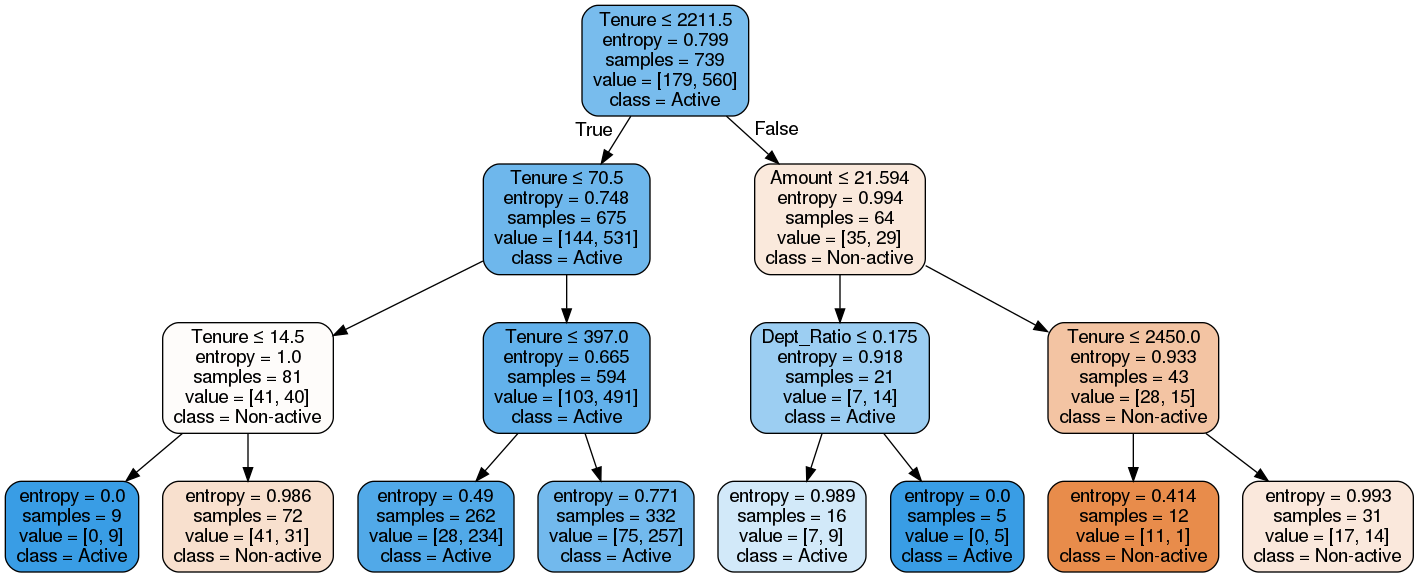

In [18]:
# Gerando os dados de treino e teste
train, test = splitdata_train_test(data, fraction_training)

# Gerando as features e os targets 
train_features, train_targets = generate_features_targets(train)
test_features, test_targets = generate_features_targets(test)

# Criando a arvore de decisão
dtree = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
dtree.fit(train_features, train_targets)

# graphviz, pydotplus para visualização da arvore
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
               feature_names=['Tenure', 'Age', 'Dept_Ratio', 'Amount'], class_names=list(set(train_targets)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Avaliando os resultados do modelo

Our accuracy score: 0.8153409090909091
Confusion matrix, without normalization
[[745  60]
 [135 116]]


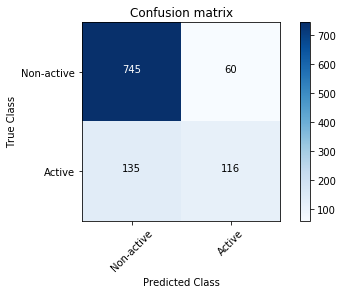

In [15]:
from sklearn import metrics

features, targets = generate_features_targets(data)

dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy')
predicted = cross_val_predict(dtc, features, targets, cv=10)

model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

class_labels = list(set(predicted))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)


plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels)
plt.savefig('dt_confusion_matrix.png')
plt.show();